### Pratica 07 - Exploracao de dados

#### Rodrigo Geurgas Zavarizz - 9791080
#### Victor Henrique de Souza Rodrigues - 9791027

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()
wine = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                   columns=wine['feature_names'] + ['target'])

# seleção dos atributos que vão ser utilizados
wine = wine.loc[:, ['alcohol', 'ash', 'hue', 'magnesium', 'target']]

# substituição de uma das classes, para binarizar o problema
wine.loc[wine.target != 0, 'target'] = 1

print(wine.head())

print(wine[wine.target == 0.0].shape[0]) #percebemos que ha 59 elementos da classe 0.0 e 119 da classe 1.0
print(wine[wine.target == 1.0].shape[0])

   alcohol   ash   hue  magnesium  target
0    14.23  2.43  1.04      127.0     0.0
1    13.20  2.14  1.05      100.0     0.0
2    13.16  2.67  1.03      101.0     0.0
3    14.37  2.50  0.86      113.0     0.0
4    13.24  2.87  1.04      118.0     0.0
59
119


In [7]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

In [8]:
def pen_falso_positivo(y_true, y_pred):
    count = 0
    
    for i,j in enumerate(y_pred):
        if y_true[i] == 0 and j == 1:
            count += 2
        elif y_true[i] == 1 and j == 0:
            count += 1
    return count/len(y_true)

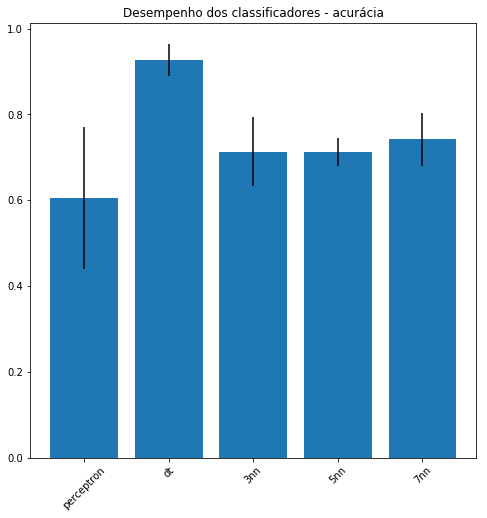

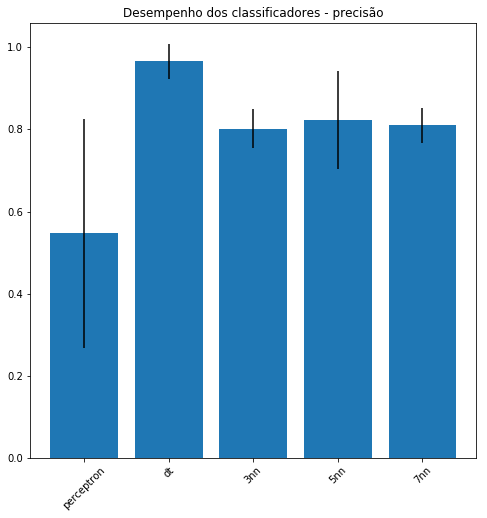

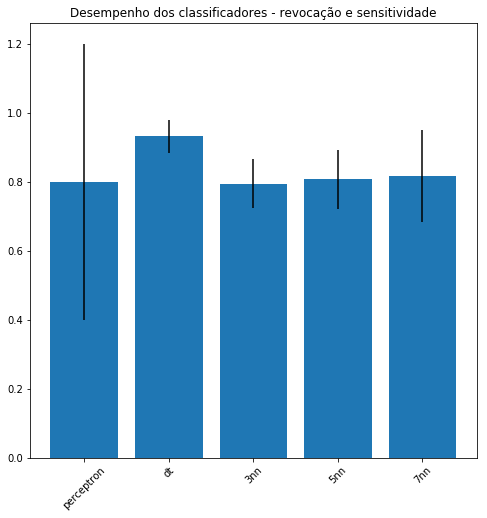

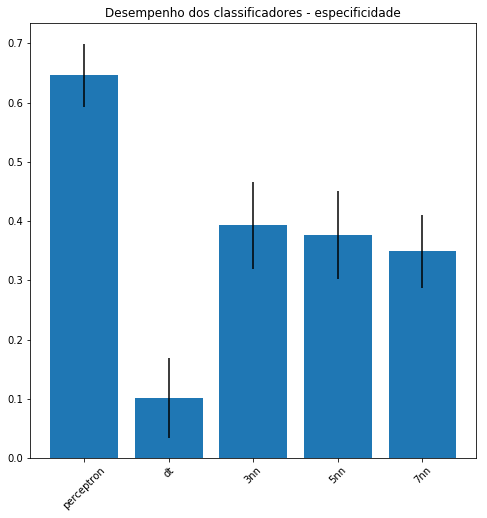

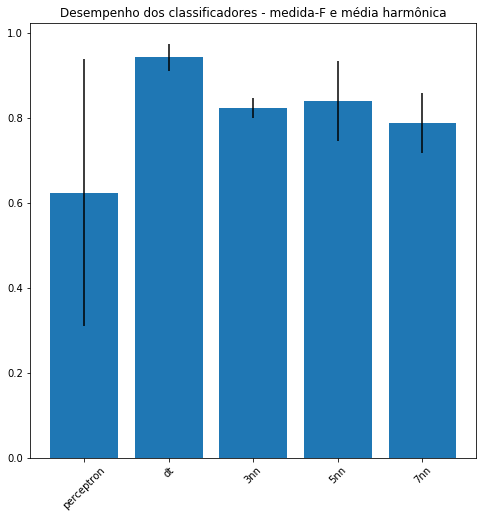

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

target = len(wine.columns)-1
columns = list(range(target))

classificacao(wine, columns, target, accuracy_score, 'acurácia')
classificacao(wine, columns, target, precision_score, 'precisão')
classificacao(wine, columns, target, recall_score, 'revocação e sensitividade')
classificacao(wine, columns, target, pen_falso_positivo, 'especificidade')
classificacao(wine, columns, target, f1_score, 'medida-F e média harmônica')
print()

### Questao 1:

**Acuracia:** percebemos que no algoritmo percebtrom ele retornou um valor muito proximo a proporcao de elementos em uma determinada classe, o que indica que nao e uma medida boa para julgar o desempenho do classificador.

**Precisao:** percebemos que dentre as metricas essa foi a que deixou o desempenho do knn com k = 3, 5 e 7. logo nao e uma boa metrica para comparar o desempenho do knn variando o valor de k.

**Revocacao** e sensibilidade: No algoritmo perceptron houveram alguns outliers que extrapolavam o valor de 1.0, entao levar em conta esses valores pode gerar uma conclusao equivocada.

**Especificidade:** Exceto para o perceptron, nos demais pode-se perceber que todos os demais tiveram um desempenho ruim, o que mostra que essa metrica nao e adequada neles.

**Medida f e media harmonica:** Nao foram encontrados problemas com essas metricas.

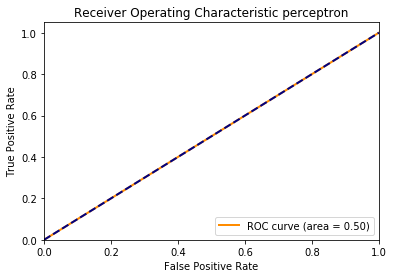

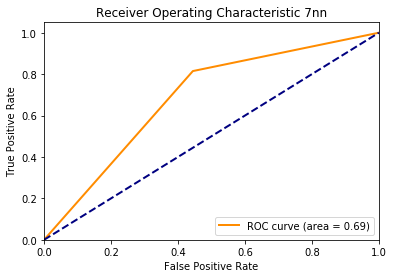

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def limited(data, columns, target, 
                  folds=10, plot=True):
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, _7nn]
    clfs_names = ['perceptron', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append((y_test, y_pred))
    
    return {'results': results, 'clfs':clfs}

def plot(y_test, y_score, n_classes, classifier):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
    roc_auc[0] = auc(fpr[0], tpr[0])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic {classifier}')
    plt.legend(loc="lower right")
    plt.show()

    
results = limited(wine, columns, target)
plot(results['results']['perceptron'][0][0], results['results']['perceptron'][0][1], 2, 'perceptron')
plot(results['results']['7nn'][0][0], results['results']['7nn'][0][1], 2, '7nn')

### Questao 3:

**Perceptron:** A partir do grafico que representa a curva roc podemos perceber que a area da curva do perceptron corresponde a 0.5, o que indica que o classficador rotula de maneira aleatoria, pois tem a mesma chance de acertar e de errar uma classificacao.

**7NN:** Percebemos que a area e maior que 0.5, isso indica que o algoritmo tem uma chance de acertar uma predicao maior do que de errar (acertar com prob de 0.69 e errar com prob de 0.31.

In [11]:
from scipy.stats import ttest_ind

def tenf(data, columns, target,
                  folds=10, plot=True):
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, _7nn]
    clfs_names = ['perceptron', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append([
                accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                pen_falso_positivo(y_test, y_pred),
                f1_score(y_test, y_pred),
            ])
    
    return {'results': results, 'clfs':clfs}

r = tenf(wine, columns, target, accuracy_score, 'acurácia')
v1 = np.array(r['results']['perceptron'][0])
v2 = np.array(r['results']['7nn'][0])

print(ttest_ind(v1, v2))

Ttest_indResult(statistic=-3.2513395408873413, pvalue=0.011677640731386907)
